In [4]:
import pandas as pd
import evds
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [ ]:
buyume=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
buyume=buyume.iloc[:34,[1,19,20,21,22]].T
buyume=buyume.iloc[:,8:]
veri=[]
for i in range(len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

In [ ]:
veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri

,Büyüme
1998-03-31,62.849285
1998-06-30,68.409052
1998-09-30,77.629008
1998-12-31,73.615347
1999-03-31,59.094928
...,...
2023-12-31,241.946014
2024-03-31,205.930974
2024-06-30,215.92336
2024-09-30,243.737511


In [7]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

In [8]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-31",freq="Q",periods=len(usd)))
usd=usd.pct_change()*100
usd=usd.dropna()
usd

,USD/TL
2006-06-30,9.336700
2006-09-30,3.109109
2006-12-31,-2.951977
2007-03-31,-3.182185
2007-06-30,-5.023656
...,...
2024-03-31,8.448607
2024-06-30,4.643019
2024-09-30,3.555937
2024-12-31,3.098104


In [9]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "31-12-2007",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','Tarih'])
kredi.columns = ['Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi=kredi.dropna()
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="M",periods=len(kredi)))
kredi=kredi.resample("Q").last()
kredi=kredi.pct_change()*100
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="Q",periods=len(kredi)))
kredi=kredi.dropna()
kredi

,Kredi
2008-03-31,8.415812
2008-06-30,8.611317
2008-09-30,6.465078
2008-12-31,0.301982
2009-03-31,-1.910862
...,...
2024-03-31,10.994405
2024-06-30,8.314733
2024-09-30,7.989453
2024-12-31,6.786281


In [10]:
params = {
    'series': "TP.KKHARTUT.KT1",
    'startDate': "31-03-2014",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kart = formatted_response['items']
kart = pd.DataFrame(kart)


kart = kart.drop(columns=['UNIXTIME','Tarih'])
kart.columns = ['Kart']
kart['Kart'] = pd.to_numeric(kart['Kart'])
kart=kart.set_index(pd.date_range(start="31-03-2014",freq="Q",periods=len(kart)))
kart=kart.pct_change()*100
kart=kart.dropna()
kart

,Kart
2014-06-30,6.763788
2014-09-30,4.445903
2014-12-31,0.341941
2015-03-31,2.981396
2015-06-30,10.861409
2015-09-30,2.101863
2015-12-31,-0.955240
2016-03-31,0.426535
2016-06-30,7.905282
2016-09-30,1.055159


In [11]:
params = {
    'series': "TP.CLI2.A01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

öncü = formatted_response['items']
öncü = pd.DataFrame(öncü)


öncü = öncü.drop(columns=['UNIXTIME','Tarih'])
öncü.columns = ['Öncü Gösterge']
öncü['Öncü Gösterge'] = pd.to_numeric(öncü['Öncü Gösterge'])
öncü=öncü.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(öncü)))
öncü=öncü.pct_change()*100
öncü=öncü.dropna()
öncü

,Öncü Gösterge
1999-06-30,1.989102
1999-09-30,-0.087589
1999-12-31,2.518921
2000-03-31,3.537326
2000-06-30,-0.159674
...,...
2024-03-31,0.892466
2024-06-30,0.629975
2024-09-30,0.917891
2024-12-31,2.184441


In [12]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['İhracat']
ihracat['İhracat'] = pd.to_numeric(ihracat['İhracat'])
ihracat=ihracat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ihracat)))
ihracat=ihracat.pct_change()*100
ihracat=ihracat.dropna()
ihracat

,İhracat
2013-06-30,2.938221
2013-09-30,-2.843534
2013-12-31,6.008618
2014-03-31,0.797169
2014-06-30,0.069491
2014-09-30,-4.059849
2014-12-31,2.623426
2015-03-31,-6.256287
2015-06-30,-2.065737
2015-09-30,-7.425967


In [13]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['İthalat']
ithalat['İthalat'] = pd.to_numeric(ithalat['İthalat'])
ithalat=ithalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ithalat)))
ithalat=ithalat.pct_change()*100
ithalat=ithalat.dropna()
ithalat

,İthalat
2013-06-30,13.045979
2013-09-30,-6.944537
2013-12-31,2.390350
2014-03-31,-8.643594
2014-06-30,6.982644
2014-09-30,-3.016522
2014-12-31,2.233891
2015-03-31,-14.936426
2015-06-30,2.664102
2015-09-30,-8.070364


In [14]:
params = {
    'series': "TP.KTF17",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tfaiz = formatted_response['items']
tfaiz = pd.DataFrame(tfaiz)


tfaiz = tfaiz.drop(columns=['UNIXTIME','Tarih'])
tfaiz.columns = ['Ticari Faiz']
tfaiz['Ticari Faiz'] = pd.to_numeric(tfaiz['Ticari Faiz'])
tfaiz=tfaiz.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tfaiz)))
tfaiz=tfaiz.dropna()
tfaiz

,Ticari Faiz
2002-03-31,58.993077
2002-06-30,49.074615
2002-09-30,45.385385
2002-12-31,43.189231
2003-03-31,44.611538
...,...
2024-03-31,56.086923
2024-06-30,64.998462
2024-09-30,60.784615
2024-12-31,59.899231


In [15]:

params = {
    'series': "TP.TRY.MT01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz1ay = formatted_response['items']
mfaiz1ay = pd.DataFrame(mfaiz1ay)


mfaiz1ay = mfaiz1ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz1ay.columns = ['Mevduat Faiz 1Ay']
mfaiz1ay['Mevduat Faiz 1Ay'] = pd.to_numeric(mfaiz1ay['Mevduat Faiz 1Ay'])
mfaiz1ay=mfaiz1ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz1ay)))
mfaiz1ay=mfaiz1ay.dropna()
mfaiz1ay

,Mevduat Faiz 1Ay
2002-03-31,61.068462
2002-06-30,51.750769
2002-09-30,50.345385
2002-12-31,48.413077
2003-03-31,47.924615
...,...
2024-03-31,45.396154
2024-06-30,55.676923
2024-09-30,54.311538
2024-12-31,54.683077


In [16]:

params = {
    'series': "TP.TRY.MT02",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz3ay = formatted_response['items']
mfaiz3ay = pd.DataFrame(mfaiz3ay)


mfaiz3ay = mfaiz3ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz3ay.columns = ['Mevduat Faiz 3Ay']
mfaiz3ay['Mevduat Faiz 3Ay'] = pd.to_numeric(mfaiz3ay['Mevduat Faiz 3Ay'])
mfaiz3ay=mfaiz3ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz3ay)))
mfaiz3ay=mfaiz3ay.dropna()
mfaiz3ay

,Mevduat Faiz 3Ay
2002-03-31,59.005385
2002-06-30,50.468462
2002-09-30,50.828462
2002-12-31,48.276923
2003-03-31,47.048462
...,...
2024-03-31,53.394615
2024-06-30,63.980000
2024-09-30,59.335385
2024-12-31,59.283846


In [17]:

params = {
    'series': "TP.TSANAYMT2021.Y1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

sanayi = formatted_response['items']
sanayi = pd.DataFrame(sanayi)


sanayi = sanayi.drop(columns=['UNIXTIME','Tarih'])
sanayi.columns = ['Sanayi']
sanayi['Sanayi'] = pd.to_numeric(sanayi['Sanayi'])
sanayi=sanayi.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(sanayi)))
sanayi=sanayi.pct_change()*100
sanayi=sanayi.dropna()
sanayi

,Sanayi
2005-06-30,-0.616297
2005-09-30,3.830180
2005-12-31,2.898139
2006-03-31,1.522466
2006-06-30,1.885331
...,...
2024-03-31,2.914283
2024-06-30,-3.814594
2024-09-30,-0.967988
2024-12-31,3.341865


In [18]:

params = {
    'series': "TP.PR.ARZ13",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m2 = formatted_response['items']
m2 = pd.DataFrame(m2)


m2 = m2.drop(columns=['UNIXTIME','Tarih'])
m2.columns = ['M2']
m2['M2'] = pd.to_numeric(m2['M2'])
m2=m2.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m2)))
m2=m2.pct_change()*100
m2=m2.dropna()
m2

,M2
2006-03-31,1.554679
2006-06-30,9.638037
2006-09-30,3.877008
2006-12-31,4.679794
2007-03-31,5.001742
...,...
2024-03-31,7.259381
2024-06-30,6.092967
2024-09-30,7.933976
2024-12-31,5.786708


In [19]:

params = {
    'series': "TP.PR.ARZ22",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','Tarih'])
m3.columns = ['M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3=m3.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m3)))
m3=m3.pct_change()*100
m3=m3.dropna()
m3

,M3
2006-03-31,1.798053
2006-06-30,9.639824
2006-09-30,2.739330
2006-12-31,3.939840
2007-03-31,4.554048
...,...
2024-03-31,8.359733
2024-06-30,7.890625
2024-09-30,10.977930
2024-12-31,7.814873


In [20]:

params = {
    'series': "TP.FG.J0",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tüfe = formatted_response['items']
tüfe = pd.DataFrame(tüfe)


tüfe = tüfe.drop(columns=['UNIXTIME','Tarih'])
tüfe.columns = ['TÜFE']
tüfe['TÜFE'] = pd.to_numeric(tüfe['TÜFE'])
tüfe=tüfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tüfe)))
tüfe=tüfe.pct_change()*100
tüfe=tüfe.dropna()
tüfe

,TÜFE
2003-06-30,3.503735
2003-09-30,0.738513
2003-12-31,2.892589
2004-03-31,2.043974
2004-06-30,1.557564
...,...
2024-03-31,14.448411
2024-06-30,9.863378
2024-09-30,8.297692
2024-12-31,7.690816


In [21]:

params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
1999-06-30,12.224920
1999-09-30,10.767969
1999-12-31,15.393947
2000-03-31,16.175187
2000-06-30,7.151731
...,...
2024-03-31,9.732860
2024-06-30,9.025570
2024-09-30,5.170864
2024-12-31,3.362095


In [22]:

params = {
    'series': "TP.GY1.N2.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

reelgüven = formatted_response['items']
reelgüven = pd.DataFrame(reelgüven)


reelgüven = reelgüven.drop(columns=['UNIXTIME','Tarih'])
reelgüven.columns = ['Reel Güven']
reelgüven['Reel Güven'] = pd.to_numeric(reelgüven['Reel Güven'])
reelgüven=reelgüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(reelgüven)))
reelgüven=reelgüven.pct_change()*100
reelgüven=reelgüven.dropna()
reelgüven

,Reel Güven
2007-06-30,-3.372093
2007-09-30,0.992780
2007-12-31,-2.442657
2008-03-31,-2.992366
2008-06-30,-6.578533
...,...
2024-03-31,-1.343570
2024-06-30,-0.648508
2024-09-30,-3.426893
2024-12-31,4.190605


In [23]:

params = {
    'series': "TP.TG2.Y01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tuketicigüven = formatted_response['items']
tuketicigüven = pd.DataFrame(tuketicigüven)


tuketicigüven = tuketicigüven.drop(columns=['UNIXTIME','Tarih'])
tuketicigüven.columns = ['Tüketici Güven']
tuketicigüven['Tüketici Güven'] = pd.to_numeric(tuketicigüven['Tüketici Güven'])
tuketicigüven=tuketicigüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tuketicigüven)))
tuketicigüven=tuketicigüven.pct_change()*100
tuketicigüven=tuketicigüven.dropna()
tuketicigüven

,Tüketici Güven
2012-06-30,-2.657194
2012-09-30,-0.096161
2012-12-31,-2.936119
2013-03-31,4.365104
2013-06-30,2.759161
2013-09-30,0.114167
2013-12-31,0.360455
2014-03-31,-3.903252
2014-06-30,4.686077
2014-09-30,-1.604023


In [24]:

params = {
    'series': "TP.KKO.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

kko = formatted_response['items']
kko = pd.DataFrame(kko)


kko = kko.drop(columns=['UNIXTIME','Tarih'])
kko.columns = ['KKO']
kko['KKO'] = pd.to_numeric(kko['KKO'])
kko=kko.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(kko)))

kko=kko.dropna()
kko

,KKO
2007-03-31,81.433333
2007-06-30,82.966667
2007-09-30,81.833333
2007-12-31,81.500000
2008-03-31,80.766667
...,...
2024-03-31,76.866667
2024-06-30,76.600000
2024-09-30,75.833333
2024-12-31,75.466667


In [25]:

params = {
    'series': "TP.TIG08",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

işsizlik = formatted_response['items']
işsizlik = pd.DataFrame(işsizlik)


işsizlik = işsizlik.drop(columns=['UNIXTIME','Tarih'])
işsizlik.columns = ['İşsizlik']
işsizlik['İşsizlik'] = pd.to_numeric(işsizlik['İşsizlik'])
işsizlik=işsizlik.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(işsizlik)))
işsizlik=işsizlik.dropna()
işsizlik

,İşsizlik
2005-03-31,9.200000
2005-06-30,9.400000
2005-09-30,9.100000
2005-12-31,9.300000
2006-03-31,9.133333
...,...
2024-03-31,8.800000
2024-06-30,8.733333
2024-09-30,8.700000
2024-12-31,8.600000


In [26]:

params = {
    'series': "TP.IYAW2.S19.B",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

normalsiparis = formatted_response['items']
normalsiparis = pd.DataFrame(normalsiparis)
normalsiparis=normalsiparis.dropna()

normalsiparis = normalsiparis.drop(columns=['UNIXTIME','Tarih'])
normalsiparis.columns = ['Normal Sipariş']
normalsiparis['Normal Sipariş'] = pd.to_numeric(normalsiparis['Normal Sipariş'])
normalsiparis=normalsiparis.set_index(pd.date_range(start="31-03-2007",freq="Q",periods=len(normalsiparis)))
normalsiparis=normalsiparis.pct_change()*100
normalsiparis=normalsiparis.dropna()
normalsiparis

,Normal Sipariş
2007-06-30,5.840886
2007-09-30,6.232160
2007-12-31,-6.090461
2008-03-31,4.577969
2008-06-30,-2.963976
...,...
2024-03-31,-0.583090
2024-06-30,0.209468
2024-09-30,-5.852843
2024-12-31,3.863233


In [27]:
elektrik=pd.read_excel("tramoseats.xlsx").dropna()
del elektrik["Unnamed: 0"]
elektrik=elektrik.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(elektrik)))
elektrik.columns=["Elektrik"]
elektrik=elektrik.resample("Q").mean()
elektrik


,Elektrik
2016-03-31,733737.51
2016-06-30,758330.78
2016-09-30,740081.486667
2016-12-31,773078.733333
2017-03-31,787076.703333
2017-06-30,778495.356667
2017-09-30,815632.403333
2017-12-31,819451.69
2018-03-31,822884.576667
2018-06-30,824701.77


In [28]:
pmi=pd.read_excel("imalatPMI.xlsx")
pmi=pmi.iloc[::-1]
pmi=pmi.drop("Yayınlanma Tarihi",axis=1)
pmi=pmi.set_index(pd.date_range(start="2015-10-31",freq="M",periods=len(pmi)))
pmi.columns=["PMI"]
pmi=pmi.resample("Q").mean()
pmi=pmi.pct_change().dropna()*100
pmi

,PMI
2016-03-31,-1.237964
2016-06-30,7.242340
2016-09-30,-3.636364
2016-12-31,-2.695418
2017-03-31,0.484765
2017-06-30,0.068918
2017-09-30,5.853994
2017-12-31,5.270007
2018-03-31,-0.123609
2018-06-30,1.175743


In [29]:
data=pd.concat([veri,ihracat,kko,ithalat,işsizlik,kart,kredi,m2,m3,mfaiz1ay,mfaiz3ay,tfaiz,öncü,reelgüven,sanayi,tüfe,tuketicigüven,üfe,usd,normalsiparis,elektrik.pct_change()*100,pmi],axis=1)
data=data.loc[:"2025-03-31"]
data.iloc[-1:]=data.iloc[-1:].fillna(method="ffill")
#data["İşsizlik"].iloc[-1]=8.
data=data.astype(float)
data=data.fillna(method="ffill")
data

,Büyüme,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,...,Öncü Gösterge,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI
1999-03-31,-1.685820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-06-30,-0.563716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.989102,NaN,NaN,NaN,NaN,12.224920,NaN,NaN,NaN,NaN
1999-09-30,-1.686618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.087589,NaN,NaN,NaN,NaN,10.767969,NaN,NaN,NaN,NaN
1999-12-31,2.987420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.518921,NaN,NaN,NaN,NaN,15.393947,NaN,NaN,NaN,NaN
2000-03-31,1.574851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.537326,NaN,NaN,NaN,NaN,16.175187,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,0.975410,-7.300078,76.866667,-3.935879,8.800000,18.057942,10.994405,7.259381,8.359733,45.396154,...,0.892466,-1.343570,2.914283,14.448411,5.103412,9.732860,8.448607,-0.583090,2.201865,-3.858731
2024-06-30,-0.195958,-1.974352,76.600000,0.880533,8.733333,18.664329,8.314733,6.092967,7.890625,55.676923,...,0.629975,-0.648508,-3.814594,9.863378,0.062309,9.025570,4.643019,0.209468,1.468599,-2.176871
2024-09-30,-0.067054,6.321683,75.833333,-0.981187,8.700000,14.247951,7.989453,7.933976,10.977930,54.311538,...,0.917891,-3.426893,-0.967988,8.297692,-3.679452,5.170864,3.555937,-5.852843,1.024188,3.963839
2024-12-31,1.687901,4.087357,75.466667,8.904160,8.600000,4.245609,6.786281,5.786708,7.814873,54.683077,...,2.184441,4.190605,3.341865,7.690816,4.829936,3.362095,3.098104,3.863233,1.024188,-4.013378


In [30]:

features=[ 'İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart',
       'Kredi', 'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay',
       'Ticari Faiz', 'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE',
       'Tüketici Güven', 'ÜFE', 'USD/TL','Normal Sipariş',
       'Elektrik','PMI','Büyüme']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["Büyüme"]=scaler.fit_transform(np.array(data1["Büyüme"]).reshape(-1, 1))
scaled_data

,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,Mevduat Faiz 3Ay,...,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI,Büyüme
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.052544
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.020782,NaN,NaN,NaN,NaN,-0.643192
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.799653,NaN,NaN,NaN,NaN,-1.052836
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.501762,NaN,NaN,NaN,NaN,0.652291
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.620334,NaN,NaN,NaN,NaN,0.136975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-0.935236,0.222235,-0.547312,-0.942956,0.830491,1.007218,0.329601,0.572396,1.989978,2.356286,...,-0.179783,0.339311,2.288790,1.101178,0.642549,0.452018,-0.132035,0.41084,-0.811546,-0.081707
101,-0.363651,0.145257,-0.027441,-0.983801,0.887794,0.427510,0.060112,0.464826,2.742309,3.105638,...,-0.099498,-1.066604,1.282775,0.035876,0.535200,-0.012007,-0.072788,0.19420,-0.455294,-0.509031
102,0.526724,-0.076055,-0.228390,-1.004223,0.470454,0.357141,0.485459,1.172768,2.642392,2.776840,...,-0.420423,-0.471841,0.939243,-0.754845,-0.049849,-0.144557,-0.525971,0.06290,0.845430,-0.462006
103,0.286924,-0.181900,0.838609,-1.065490,-0.474750,0.096852,-0.010646,0.447456,2.669581,2.773192,...,0.459457,0.428649,0.806086,1.043386,-0.324375,-0.200382,0.200347,0.06290,-0.844303,0.178216


In [31]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [103]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

features=['İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI']
predictions=[]
features_set=[]

def objective(trial):
    features=["KKO","Kart","Reel Güven","Sanayi","Tüketici Güven","Normal Sipariş","Elektrik","PMI"]
    selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven","Elektrik"]
    """for feature in features:
        if trial.suggest_categorical(feature, (True, False)):
            selected_features.append(feature)"""

    X=scaled_data[selected_features]
    y=scaled_data["Büyüme"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["Büyüme"])
    X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
    y_train,y_test=y[:-11],y[-11:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 2, 256)
    batch_size = trial.suggest_int('batch_size', 4, 128)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','sigmoid','linear','elu'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    
    
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test[:-1]), scaler.inverse_transform(y_pred[:-1]))
    print(scaler.inverse_transform(y_pred)[-1])
    predictions.append(scaler.inverse_transform(y_pred)[-1])
    features_set.append(selected_features)

    return mse  # Return validation accuracy as the objective

In [ ]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

In [108]:
trials=study.trials_dataframe()[:-1]
trials=trials.sort_values(by="value")

In [109]:
trials.to_excel("trials3.xlsx")

In [33]:
scaled_data=scaled_data.dropna()


In [52]:
study.best_params

{'learning_rate': 0.05263172052219466,
 'units1': 237,
 'batch_size': 25,
 'activation1': 'relu',
 'optimizer': 'adam',
 'rlrate': 0.7851860002874791}

In [42]:
trials=pd.read_excel("trials1.xlsx")
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","PMI","Reel Güven"]

X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
y_train,y_test=y[:-11],y[-11:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
tahminler=[]
modeller=pd.DataFrame()
hata=[]
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=150,activation='linear',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.6763321429069602)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.04429291813678478)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=52,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler1=pd.DataFrame()
    tahminler1["Büyüme"]=data["Büyüme"].iloc[-11:]
    tahminler1["Tahmin"]=pred["Büyüme"]
    tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.35647118
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
0.1579877
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0.4606611
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.45895028
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.13967167
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
0.5914914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2.0913026
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1.5650713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0.32683837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0.52276886


In [43]:
study.best_params

{'learning_rate': 0.04429291813678478,
 'units1': 150,
 'batch_size': 52,
 'activation1': 'linear',
 'optimizer': 'adam',
 'rlrate': 0.6763321429069602}

In [44]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=150,activation='linear',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.6763321429069602)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.04429291813678478)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=52,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,Büyüme
2022-09-30,0.262258
2022-12-31,1.533635
2023-03-31,0.970621
2023-06-30,3.337705
2023-09-30,0.768810
2023-12-31,0.681607
2024-03-31,1.314546
2024-06-30,0.099576
2024-09-30,0.131629
2024-12-31,1.214941


In [45]:
tahminler1=pd.DataFrame()
tahminler1["Büyüme"]=data["Büyüme"].iloc[-11:]
tahminler1["Tahmin"]=pred["Büyüme"]
tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
tahminler1

,Büyüme,Tahmin
2022-09-30,0.542207,0.262258
2022-12-31,1.148543,1.533635
2023-03-31,0.101158,0.970621
2023-06-30,3.998077,3.337705
2023-09-30,0.239144,0.768810
2023-12-31,1.166981,0.681607
2024-03-31,0.975410,1.314546
2024-06-30,-0.195958,0.099576
2024-09-30,-0.067054,0.131629
2024-12-31,1.687901,1.214941


In [46]:
mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1])

0.24003781871214053

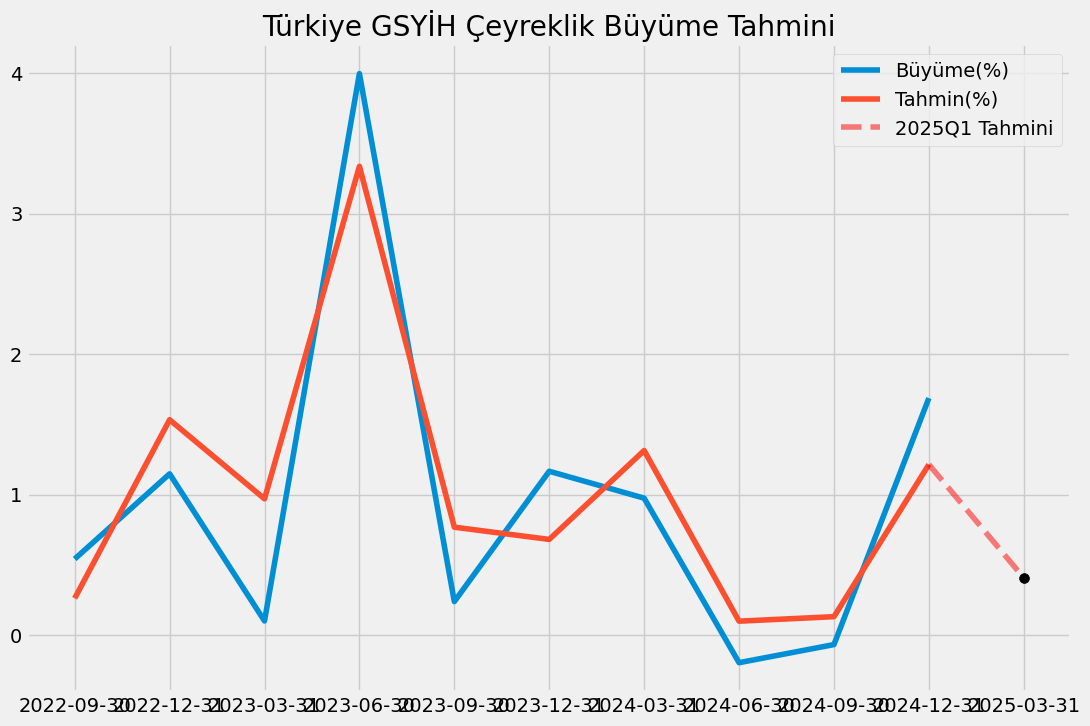

In [48]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler1["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler1["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler1["Tahmin"].iloc[-2:],"--",label="2025Q1 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler1.index[-1],y=tahminler1["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [100]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
y_train,y_test=y[:-11],y[-11:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=237,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7851860002874791)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.05263172052219466)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=25,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler2=pd.DataFrame()
    tahminler2["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler2["Tahmin"]=pred["Büyüme"]
    tahminler2.index=tahminler2.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i+10}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0.09377395
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
-0.26880062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
-0.109107025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
-0.19147862
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
0.03060495
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
-0.36993134
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
-0.013276229
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0.13221072
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
-0.56285477
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
-0.1519828


In [101]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=237,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7851860002874791)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05263172052219466)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=25,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))


pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,Büyüme
2022-09-30,0.463168
2022-12-31,1.720112
2023-03-31,0.991796
2023-06-30,3.508949
2023-09-30,0.753257
2023-12-31,0.253555
2024-03-31,1.556219
2024-06-30,0.212273
2024-09-30,-0.174320
2024-12-31,1.496555


In [102]:
tahminler2=pd.DataFrame()
tahminler2["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler2["Tahmin"]=pred["Büyüme"]
tahminler2.index=tahminler2.index.strftime("%Y-%m-%d")
tahminler2

,Büyüme,Tahmin
2022-12-31,1.148543,1.720112
2023-03-31,0.101158,0.991796
2023-06-30,3.998077,3.508949
2023-09-30,0.239144,0.753257
2023-12-31,1.166981,0.253555
2024-03-31,0.975410,1.556219
2024-06-30,-0.195958,0.212273
2024-09-30,-0.067054,-0.174320
2024-12-31,1.687901,1.496555
2025-03-31,1.687901,0.516833


In [106]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven","Elektrik"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
y_train,y_test=y[:-11],y[-11:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=228,activation='linear',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.3608024976215217)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.029258310584955878)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=62,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler3=pd.DataFrame()
    tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler3["Tahmin"]=pred["Büyüme"]
    tahminler3.index=tahminler3.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i+20}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0.85244703
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.7611127
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1.008513
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0.95485705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.99119616
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1.0508486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1.1416465
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0.93445843
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.8399374
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1.0338717


In [108]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=228,activation='linear',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.3608024976215217)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.029258310584955878)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=62,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,Büyüme
2022-09-30,0.524763
2022-12-31,1.612776
2023-03-31,1.016625
2023-06-30,2.474949
2023-09-30,0.175468
2023-12-31,0.798913
2024-03-31,1.523597
2024-06-30,0.250816
2024-09-30,-0.084482
2024-12-31,1.580190


In [109]:
tahminler3=pd.DataFrame()
tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler3["Tahmin"]=pred["Büyüme"]
tahminler3.index=tahminler3.index.strftime("%Y-%m-%d")
tahminler3

,Büyüme,Tahmin
2022-12-31,1.148543,1.612776
2023-03-31,0.101158,1.016625
2023-06-30,3.998077,2.474949
2023-09-30,0.239144,0.175468
2023-12-31,1.166981,0.798913
2024-03-31,0.975410,1.523597
2024-06-30,-0.195958,0.250816
2024-09-30,-0.067054,-0.084482
2024-12-31,1.687901,1.580190
2025-03-31,1.687901,0.842007


In [110]:
predictions=pd.DataFrame()
predictions["Tahmin"]=tahminler
predictions["Hata"]=hata
predictions["Ağırlık"]=1/predictions["Hata"]
predictions

,Tahmin,Hata,Ağırlık
0,0.356471,1.068487,0.935903
1,0.157988,0.875134,1.142682
2,0.460661,1.001169,0.998832
3,0.458950,0.543213,1.840897
4,0.139672,0.584981,1.709457
5,0.591491,0.585870,1.706864
6,2.091303,1.192609,0.838498
7,1.565071,0.733851,1.362675
8,0.326838,0.927267,1.078438
9,0.522769,0.319015,3.134645


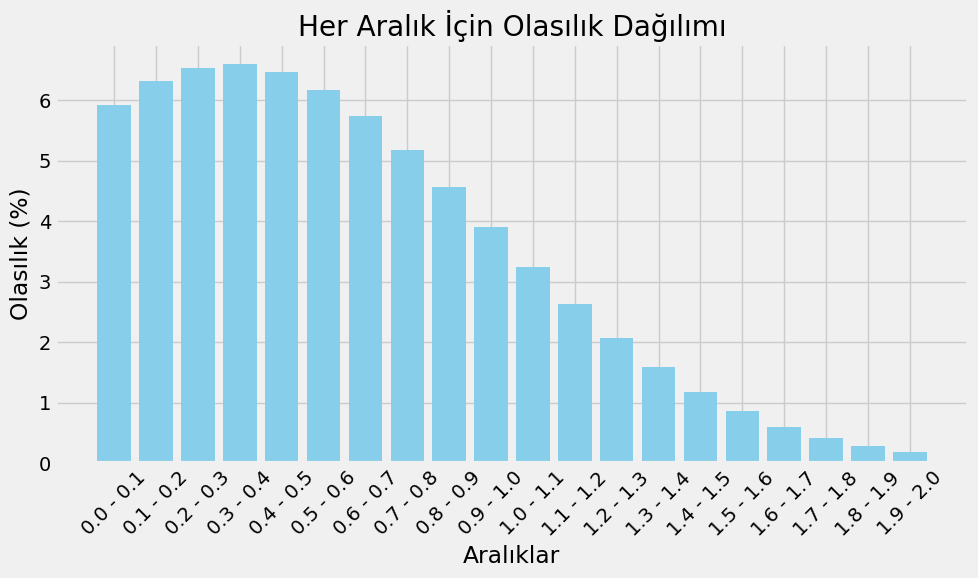

In [112]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

tahmin_degerleri = predictions["Tahmin"]

# Ortalama ve standart sapma hesapla
ortalama = np.mean(tahmin_degerleri)
standart_sapma = np.std(tahmin_degerleri)

# 1.7'den başlayıp her 0.1'lik aralık için olasılık hesaplama
baslangic = 0
bitis =  2.1

# 0.1'lik adımlarla aralıkları hesaplama
araliklar = np.arange(baslangic, bitis, 0.1)
olasliklar = []

for i in range(len(araliklar) - 1):
    alt = araliklar[i]
    ust = araliklar[i + 1]
    # Aralık için olasılığı hesapla
    olasilik = stats.norm.cdf(ust, loc=ortalama, scale=standart_sapma) - stats.norm.cdf(alt, loc=ortalama, scale=standart_sapma)
    olasliklar.append((alt, ust, olasilik))

# Bar grafik için verileri hazırlama
araliklar_labels = [f"{alt:.1f} - {ust:.1f}" for alt, ust, _ in olasliklar]
olasliklar_degerleri = [olasilik * 100 for _, _, olasilik in olasliklar]  # Olasılığı yüzdeye dönüştür

# Bar grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(araliklar_labels, olasliklar_degerleri, color='skyblue')

# Başlık ve etiketler
plt.title('Her Aralık İçin Olasılık Dağılımı')
plt.xlabel('Aralıklar')
plt.ylabel('Olasılık (%)')
plt.xticks(rotation=45)  # Etiketlerin daha okunabilir olması için döndürme

# Grafiği gösterme
plt.tight_layout()
plt.show()

In [115]:
tahmin_degerleri=predictions["Tahmin"]
ortalama = np.sum(predictions["Tahmin"]*predictions["Ağırlık"])/(np.sum(predictions["Ağırlık"]))
standart_sapma = np.std(tahmin_degerleri)

for esik in [0.85]:
    z = stats.norm.ppf(esik) 
    if esik==0.995:
        guven=99
    elif esik==0.975:
        guven=95
    elif esik==0.95:
        guven=90
    elif esik==0.85:
        guven=70


    alt_limit = ortalama - z * standart_sapma
    ust_limit = ortalama + z * standart_sapma

    print(f"%{guven} olasılıkla tahminler {alt_limit:.2f} ile {ust_limit:.2f} arasındadır.")

%70 olasılıkla tahminler -0.10 ile 1.15 arasındadır.


In [116]:
sonuç=pd.DataFrame()
sonuç=pd.concat([tahminler1["Tahmin"],tahminler2["Tahmin"],tahminler3["Tahmin"]],axis=1)
sonuç["Ortalama"]=sonuç.mean(axis=1)
sonuç["Büyüme"]=tahminler1["Büyüme"]
sonuç.index=pd.to_datetime(sonuç.index)
sonuç

,Tahmin,Tahmin,Tahmin,Ortalama,Büyüme
2022-09-30,0.262258,NaN,NaN,0.262258,0.542207
2022-12-31,1.533635,1.720112,1.612776,1.622175,1.148543
2023-03-31,0.970621,0.991796,1.016625,0.993014,0.101158
2023-06-30,3.337705,3.508949,2.474949,3.107201,3.998077
2023-09-30,0.768810,0.753257,0.175468,0.565845,0.239144
2023-12-31,0.681607,0.253555,0.798913,0.578025,1.166981
2024-03-31,1.314546,1.556219,1.523597,1.464787,0.975410
2024-06-30,0.099576,0.212273,0.250816,0.187555,-0.195958
2024-09-30,0.131629,-0.174320,-0.084482,-0.042391,-0.067054
2024-12-31,1.214941,1.496555,1.580190,1.430562,1.687901


In [117]:
import pandas as pd
from datetime import datetime


csv_file = "C:/Users/Bora/Documents/GitHub/BuyumeTahmin/cari.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = sonuç["Ortalama"].iloc[-1]

try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-03-26 tarihli tahmin başarıyla eklendi.


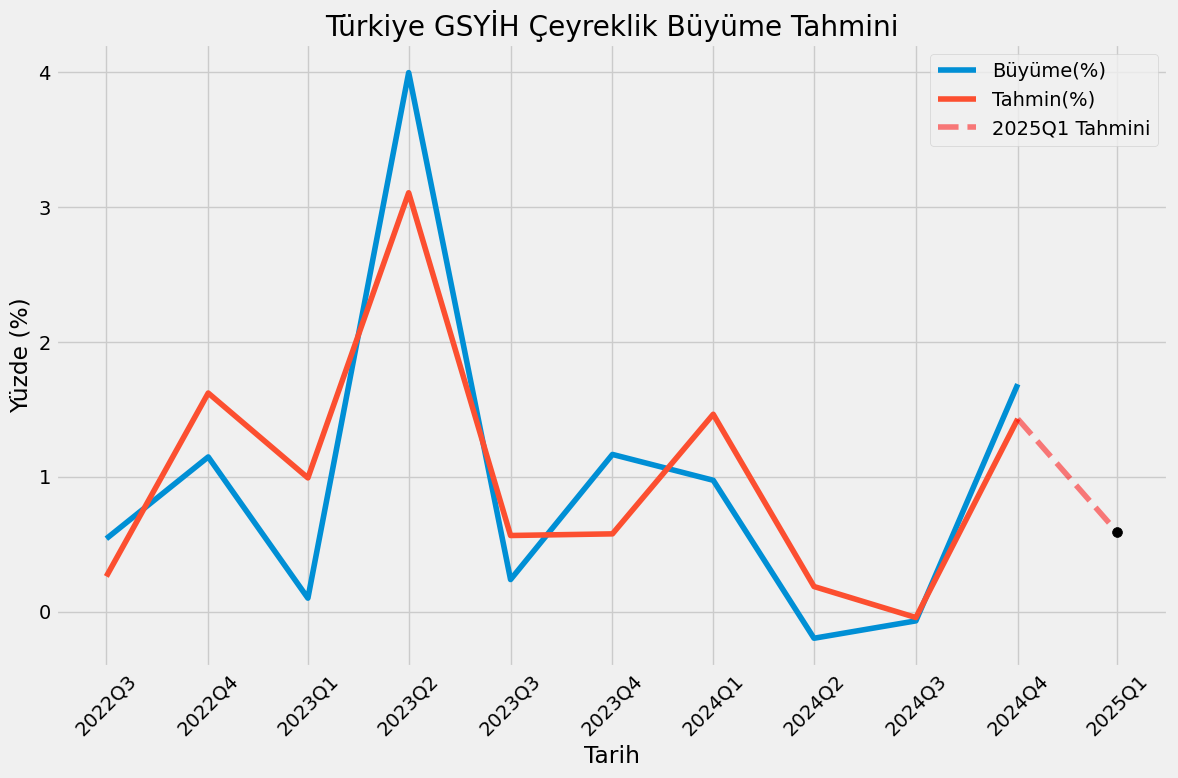

In [118]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.show()


In [128]:
yıllık=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
yıllık=yıllık.iloc[6:34,14:18]


veri=[]
for i in range(len(yıllık)):
   veri.append(yıllık.iloc[i,:].values)


veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1998-03-31",freq="Q",periods=len(veri)))

In [129]:


veri.loc[pd.to_datetime("2025-03-31")]=veri["Büyüme"].iloc[-1]*(1+(sonuç["Ortalama"].iloc[-1]/100))


In [130]:
veri["Tahmin"]=0
veri["Tahmin"].loc[sonuç.index[0]]=veri.loc["2022-09-30","Büyüme"]*(1+(sonuç["Ortalama"].iloc[0]/100))
for i in range(1,len(sonuç)):
    veri["Tahmin"].loc[sonuç.index[i]]=veri.loc[sonuç.index[i-1],"Büyüme"]*(1+(sonuç["Ortalama"].iloc[i]/100))

veri["Üst"]=0
veri["Üst"].iloc[-1]=(1+(df["Üst"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

veri["Alt"]=0
veri["Alt"].iloc[-1]=(1+(df["Alt"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

In [131]:
veri=veri[veri["Tahmin"]!=0]
for i in range(len(veri)):
    veri["Tahmin"].iloc[i]=((veri["Tahmin"].iloc[i]/veri["Büyüme"].iloc[i-4])-1)*100


In [132]:
veri["Üst"]=((veri["Üst"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Alt"]=((veri["Alt"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Büyüme"]=veri["Büyüme"].pct_change(4)*100



In [134]:
veri.to_csv("yıllık.csv")

In [135]:
import pandas as pd
from datetime import datetime


csv_file = "C:/Users/Bora/Documents/GitHub/BuyumeTahmin/cariyıl.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = veri["Büyüme"].iloc[-1]
ust_limit=veri["Üst"].iloc[-1]
alt_limit=veri["Alt"].iloc[-1]
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-03-26 tarihli tahmin başarıyla eklendi.


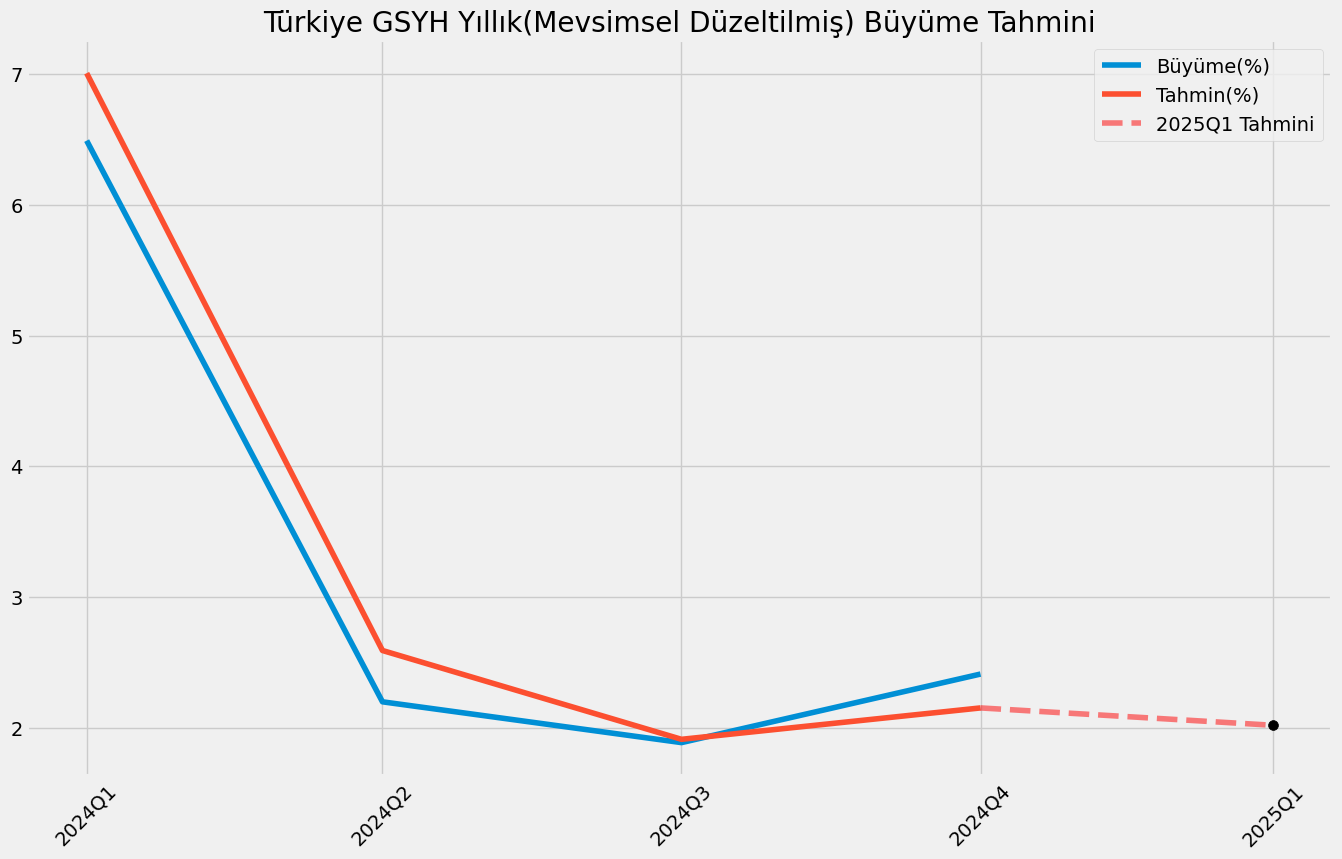

In [136]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-5:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-5:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-5:]]
plt.xticks(ticks=veri.index[-5:], labels=tarihler, rotation=45)
plt.grid(True)





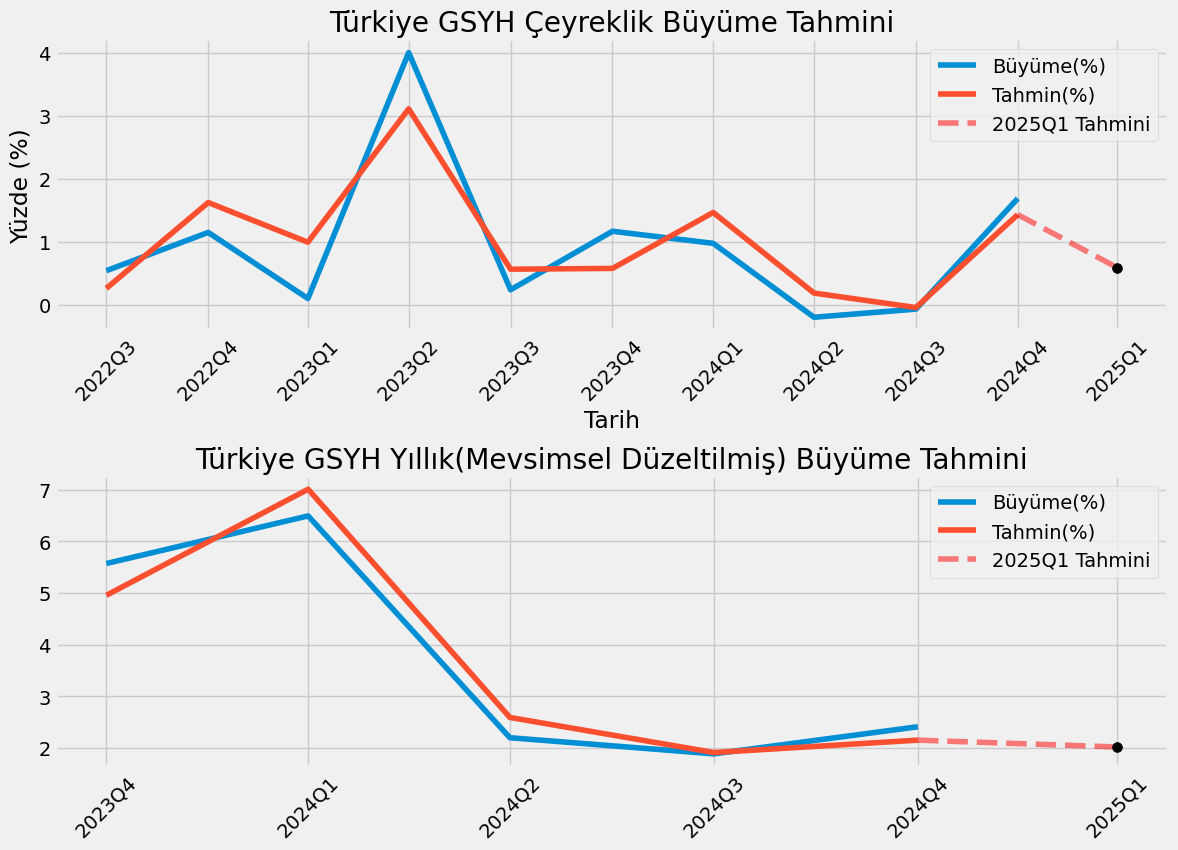

In [138]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.subplot(2,1,2)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"



plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-6:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-6:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-6:]]
plt.xticks(ticks=veri.index[-6:], labels=tarihler, rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.grid(True)





In [130]:
import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")


git_add_commit_push()

Commit işlemi başarılı: update
Push işlemi başarılı.


In [139]:
günlük=pd.read_csv("cari.csv",index_col=0).drop_duplicates(keep="last")
yıllık=pd.read_csv("cariyıl.csv",index_col=0).drop_duplicates(keep="last")
yıllık

,Tahmin,Üst,Alt
2024-12-09,1.466983,1.639763,1.329052
2024-12-11,1.436758,1.602258,1.304639
2024-12-12,1.446833,1.614760,1.312777
2024-12-13,1.477058,1.652264,1.337190
2024-12-16,1.456908,1.627261,1.320914
2024-12-18,1.486125,1.663516,1.344514
2024-12-19,1.426683,1.589756,1.296501
2024-12-20,1.507283,1.689769,1.361603
2024-12-23,1.487133,1.664766,1.345328
2024-12-24,1.536500,1.726024,1.385202


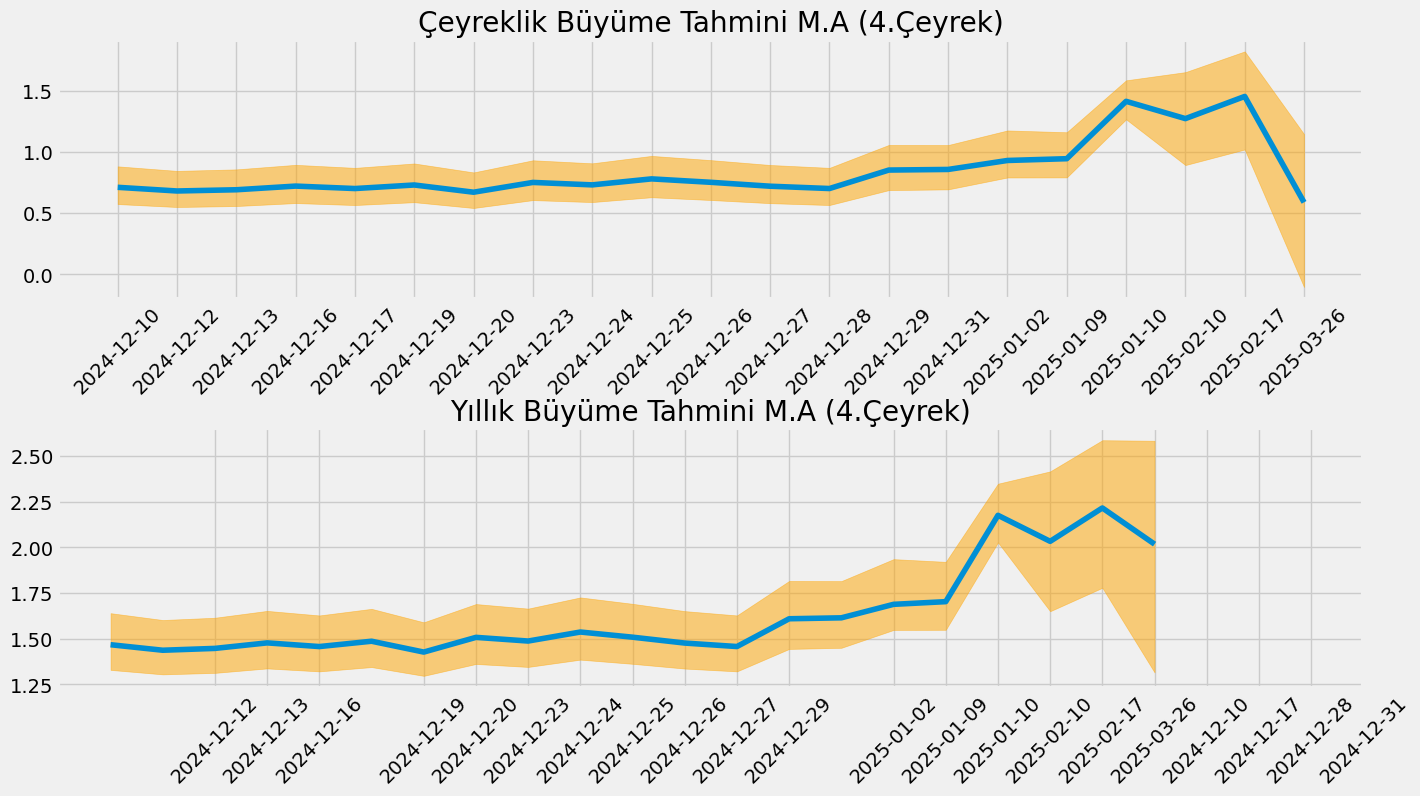

In [140]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Çeyreklik Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(günlük["Tahmin"],label="Ortalama")
plt.fill_between(günlük.index,günlük["Üst"],günlük["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplot(2,1,2)
plt.title("Yıllık Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(yıllık["Tahmin"],label="Ortalama")
plt.fill_between(yıllık.index,yıllık["Üst"],yıllık["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplots_adjust(hspace=0.5)


In [153]:



ham=pd.read_excel("veri3.xlsx",index_col=0)
arındırılmış=pd.read_excel("veri2.xlsx",index_col=0)
arındırılmış.index=pd.to_datetime(arındırılmış.index)
ham.index=pd.to_datetime(ham.index)


arındırılmış.loc["2025-03-31"]=((günlük["Tahmin"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"]
arındırılmış.index=pd.to_datetime(arındırılmış.index)

ham_yıllık=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık=ham_yıllık.values[0]
ham_yıllık=np.round(ham_yıllık,2)


arındırılmış.loc["2025-03-31"]=((günlük["Üst"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"].values[0]

ham_yıllık_üst=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık_üst=ham_yıllık_üst.values[0]
ham_yıllık_üst=np.round(ham_yıllık_üst,2)


arındırılmış.loc["2025-03-31"]=((günlük["Alt"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"].values[0]

ham_yıllık_alt=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık_alt=ham_yıllık_alt.values[0]
ham_yıllık_alt=np.round(ham_yıllık_alt,2)

In [156]:
import pandas as pd
from datetime import datetime


csv_file = "C:/Users/Bora/Documents/GitHub/BuyumeTahmin/ham.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = ham_yıllık
ust_limit=ham_yıllık_üst
alt_limit=ham_yıllık_alt
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-03-26 tarihli tahmin başarıyla eklendi.


In [157]:
df

,Tahmin,Üst,Alt
2024-12-10,2.01,2.18,1.87
2024-12-11,2.03,2.21,1.88
2024-12-12,1.98,2.14,1.84
2024-12-13,1.99,2.16,1.85
2024-12-16,2.02,2.19,1.88
2024-12-17,2.00,2.17,1.86
2024-12-18,2.03,2.21,1.88
2024-12-19,2.03,2.20,1.88
2024-12-20,1.97,2.13,1.84
2024-12-23,2.05,2.23,1.90


In [159]:
df

,Tahmin,Üst,Alt
2024-12-10,2.01,2.18,1.87
2024-12-11,2.03,2.21,1.88
2024-12-12,1.98,2.14,1.84
2024-12-13,1.99,2.16,1.85
2024-12-16,2.02,2.19,1.88
2024-12-17,2.00,2.17,1.86
2024-12-18,2.03,2.21,1.88
2024-12-19,2.03,2.20,1.88
2024-12-20,1.97,2.13,1.84
2024-12-23,2.05,2.23,1.90


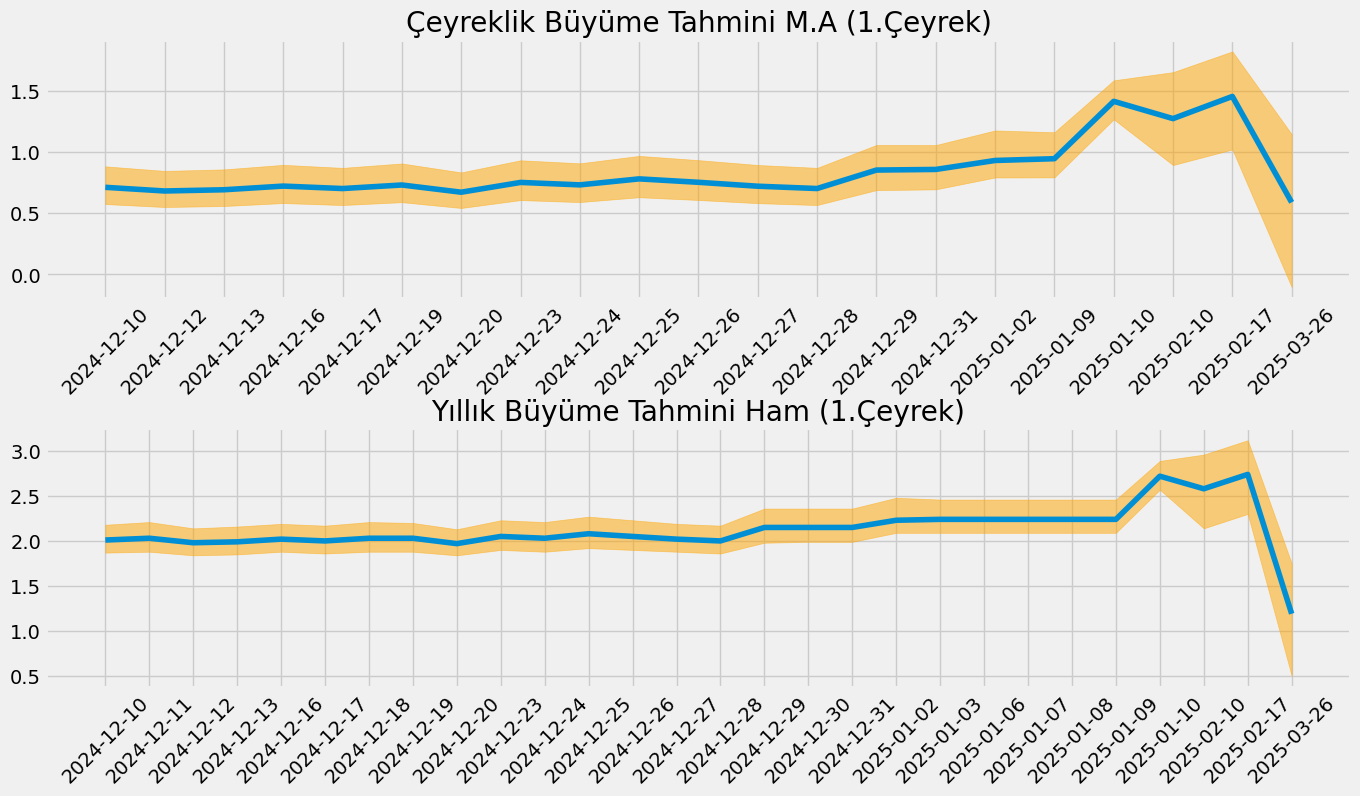

In [158]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Çeyreklik Büyüme Tahmini M.A (1.Çeyrek)")
plt.plot(günlük["Tahmin"],label="Ortalama")
plt.fill_between(günlük.index,günlük["Üst"],günlük["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplot(2,1,2)
plt.title("Yıllık Büyüme Tahmini Ham (1.Çeyrek)")
plt.plot(df["Tahmin"],label="Ortalama")
plt.fill_between(df.index,df["Üst"],df["Alt"],alpha=0.5,color="orange")
plt.xticks(df.index,rotation=45)

plt.subplots_adjust(hspace=0.5)
